In [1]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.morphology import binary_opening, binary_closing
from scipy.ndimage import convolve

from collections import Counter
import re

import nltk

from sklearn.datasets import fetch_20newsgroups

# Working with Images and Text

## Images basics

Problems:
1. Readn an image.
2. Show it.
3. Show only one channel.
4. Show part of the image.
5. Extract each color channel. Компоненти.
6. Plot the hystogram for each color. Add axis labels.
7. DRAW CONCLUSIONS from the image hystogram.
8. Combine the 3 channels - get the mean.
9. Combine the 3 channels - use coefficients suitable for the human eye.
10. Find the max value for blue.
11. Find max/mean ratio for blue.
12. Find max/std ratio for blue.
13. Define Peak signal to noise ratio (PSNR) and SNR.
14. Make random image. Do its hystogram and PSNR.

In [3]:
tiger = imread('https://s1.1zoom.me/b4948/818/Tigers_Run_Glance_580429_600x800.jpg')

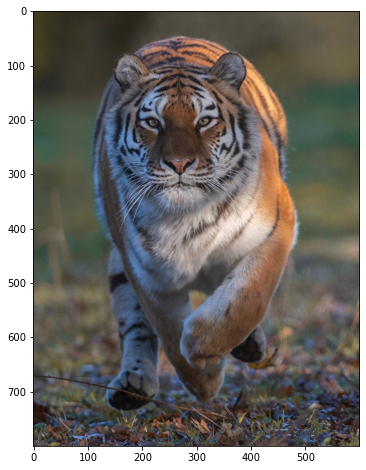

In [4]:
plt.figure(figsize = (8, 8))
plt.imshow(tiger)
plt.show()

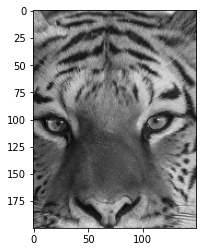

In [5]:
plt.imshow(tiger[100:300, 200:350, 0], cmap="gray")
plt.show()

In [6]:
red = tiger[:, :, 0]
green = tiger[:, :, 1]
blue = tiger[:, :, 2]

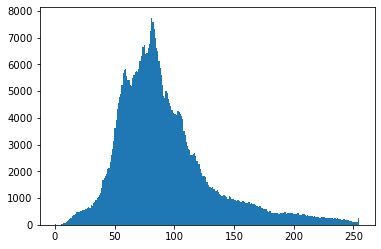

In [7]:
plt.hist(red.ravel(), bins=256)
plt.show()

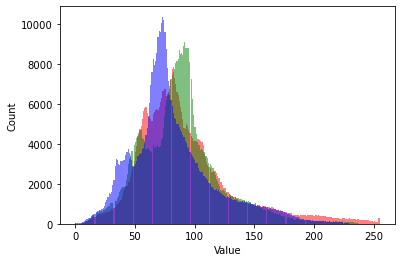

In [8]:
colors = ['red', 'green', 'blue']
channels = [red, green, blue]


for channel, color in zip(channels, colors):
    plt.hist(channel.ravel(), bins=256, color=color, alpha= 0.5)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

CONCLUSIONS:
* picture is more underexposed
* the contents of the channles are similar
* 

In [9]:
tiger_grayscale = np.mean(tiger, axis = 2)

In [10]:
def show_image(img):
    plt.figure(figsize=(8,8))
    plt.imshow(img, cmap='gray')
    plt.show()

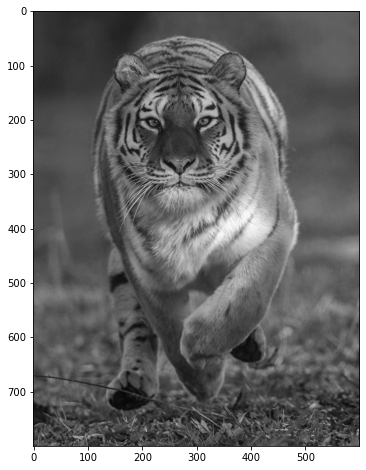

In [11]:
show_image(tiger_grayscale)

In [12]:
tiger_grayscale_better = 0.299 * red + 0.587 * green + 0.114 * blue 

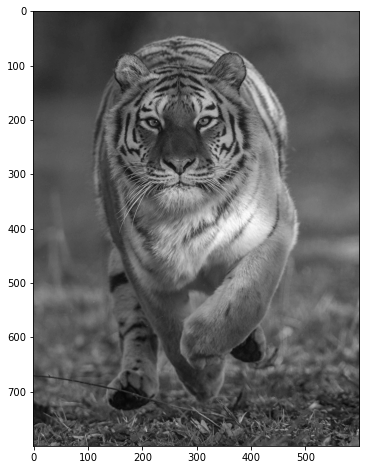

In [13]:
show_image(tiger_grayscale_better)

In [14]:
tiger_grayscale_experiment = 0.8 * red + 0.2 * green + 0.1 * blue 

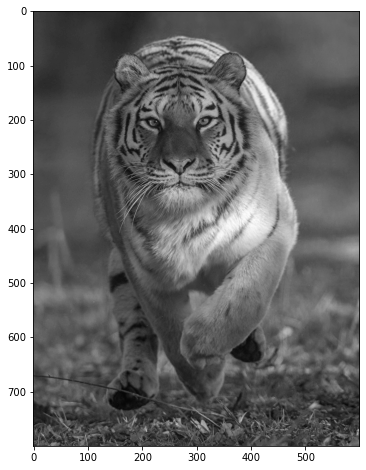

In [15]:
show_image(tiger_grayscale_experiment)

In [16]:
blue.max()

255

In [17]:
blue.mean()

82.24172083333333

In [18]:
blue.max() / blue.mean()

3.100616054919003

In [19]:
blue.max() / blue.std(ddof=1)

7.063583402334406

In [20]:
tiger_grayscale.max() / tiger_grayscale.std(ddof=1)

7.030192790932817

In [21]:
random_image = np.random.randint(0, 255, size = (600, 500, 3))

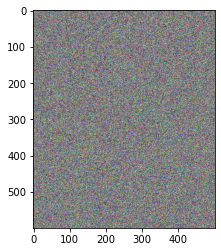

In [22]:
plt.imshow(random_image)

In [23]:
r, g, b = [random_image[:, :, i] for i in range(3)]

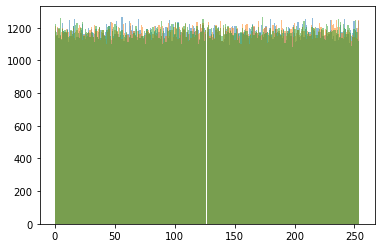

In [24]:
for color in [r, g, b]:
    plt.hist(color.ravel(), bins=256, alpha=0.5)
plt.show()

## Convolution

Problems:
1. Explain what is kernal.
2. Write the convoluion algorithm.
3. Test different convolution matrices, see wikipedia.
4. Import and test the scipy function.

In [25]:
kernel = np.ones((3, 3)) / 9

In [26]:
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

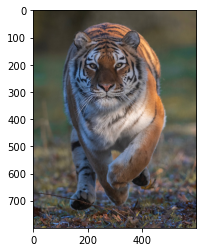

In [27]:
plt.imshow(tiger)

In [28]:
# tiger * kernel  # Invalid, shapes are not equivalent

In [29]:
tiger[0:3, 0:3, 0] * kernel

array([[7.22222222, 7.11111111, 7.11111111],
       [7.33333333, 7.22222222, 7.11111111],
       [7.33333333, 7.22222222, 7.22222222]])

**Convolution algorightm**

In [39]:
def custom_convolve(image, kernel):
    original_image_row_count, original_image_col_count = image.shape
    
    row_offset, col_offset = [int(x/2) for x in kernel.shape]
    
    new_image_row_count = int(original_image_row_count - 2*row_offset)
    new_image_col_count = int(original_image_col_count - 2*col_offset)
    new_image = np.empty(shape = (new_image_row_count, new_image_col_count))
    
    rows_to_convolve = range(row_offset, row_offset + new_image_row_count)
    cols_to_convolve = range(col_offset, col_offset + new_image_col_count)
    
    for i in rows_to_convolve:
        for j in cols_to_convolve:
            product = kernel * image[i - row_offset: i + row_offset + 1, j - col_offset: j + col_offset + 1]
            new_image[i - row_offset, j - col_offset] = product.sum()
    
    return new_image

In [43]:
red = tiger[:, :, 0]

In [51]:
def plot_image(img):
    plt.figure(figsize = (6, 6))
    plt.imshow(img, cmap='gray')
    plt.show()

def plot_convolution(image, kernel, title):
    print(title)
    convolved_tiger = custom_convolve(red, kernel)
    plot_image(red[200:400, 200:400, ])
    plot_image(convolved_tiger[200:400, 200:400, ])

Ridge detection 1


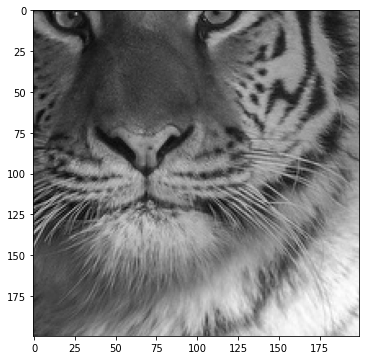

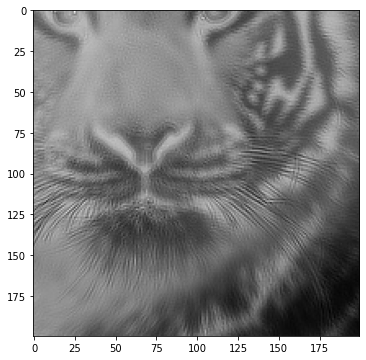

In [52]:
kernel = np.array([
    [-1, -1, -1],
    [-1, 4, -1],
    [-1, -1, -1],
])

plot_convolution(red, kernel, "Ridge detection 1")

Ridge detection 2


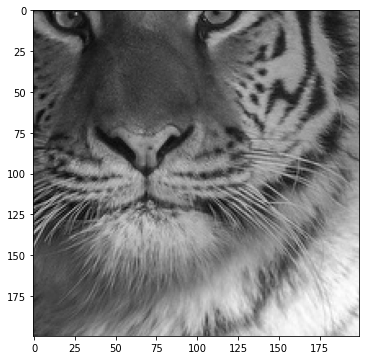

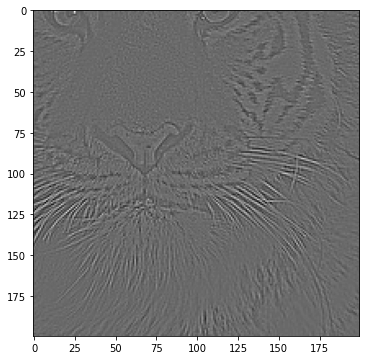

In [53]:
kernel = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1],
])

plot_convolution(red, kernel, "Ridge detection 2")

Identity


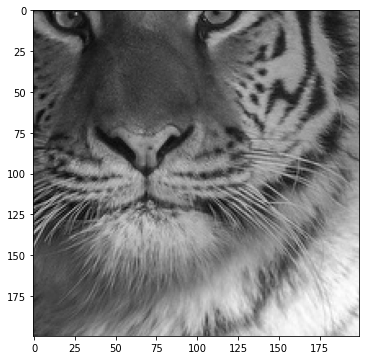

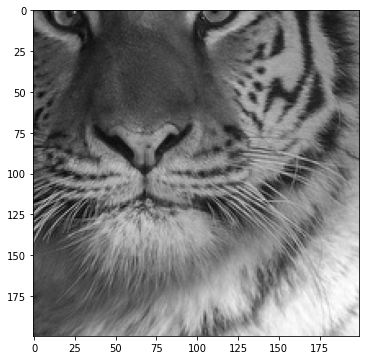

In [54]:
kernel = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0],
])

plot_convolution(red, kernel, "Identity")

Identity 2


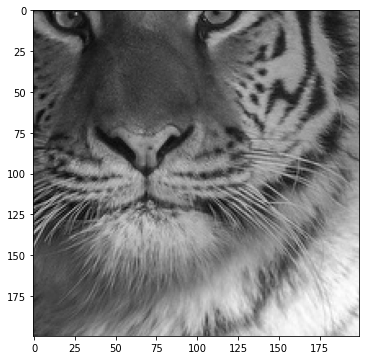

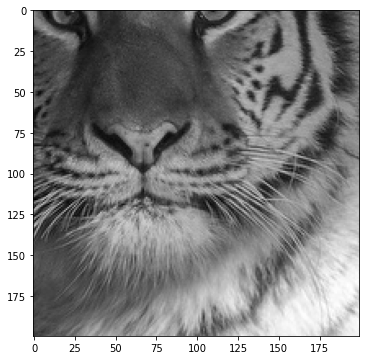

In [57]:
kernel = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
])

plot_convolution(red, kernel, "Identity 2")

Sharpern


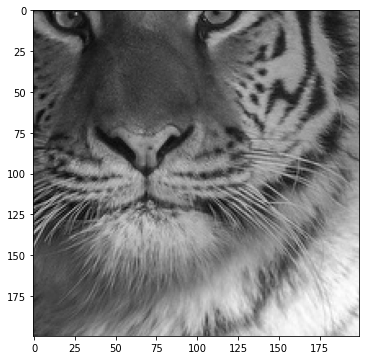

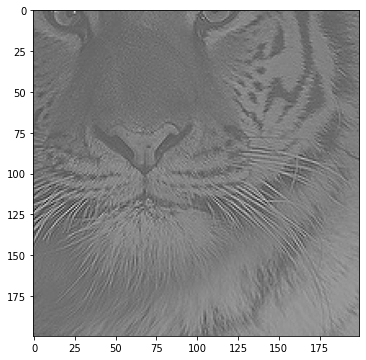

In [58]:
kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0],
])

plot_convolution(red, kernel, "Sharpen")

Box blur


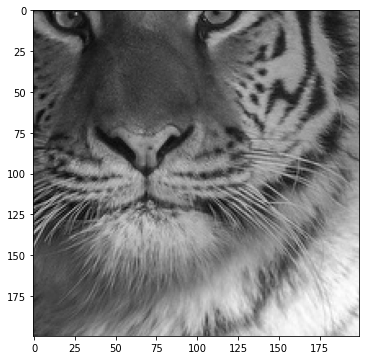

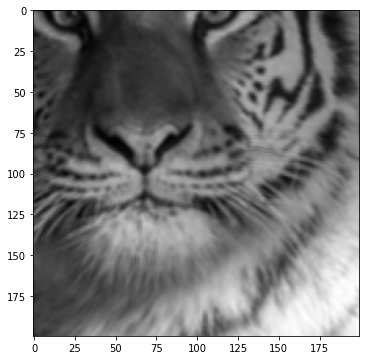

In [59]:
kernel = 1/9 * np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
])

plot_convolution(red, kernel, "Box blur")

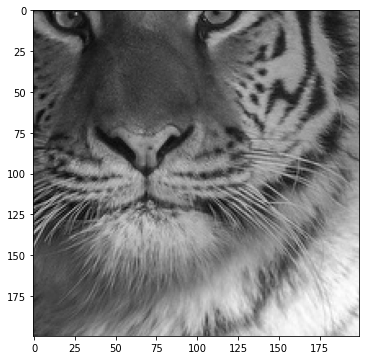

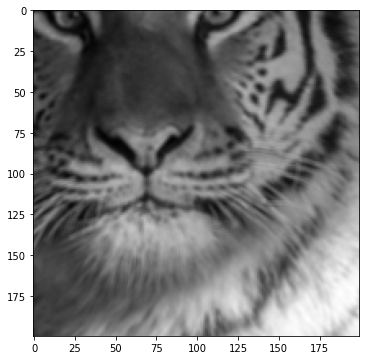

In [61]:
kernel = 1/9 * np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
])

convolved_tiger = convolve(red, kernel)
plot_image(red[200:400, 200:400, ])
plot_image(convolved_tiger[200:400, 200:400, ])

## Morphological operations

Steps:

1. Make the tiger image only with 0 and 1 (thresholding).
2. Write custom erosion, dilation, opening.
3. Use skimage opening.
4. Compare

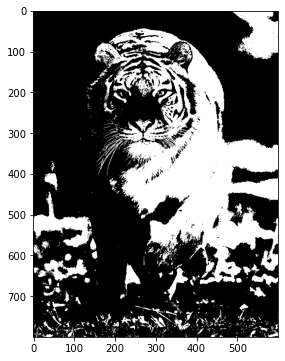

In [63]:
tiger_bw = tiger[:,:,0]

tiger_bw[tiger_bw > 100] = 255
tiger_bw[tiger_bw <= 100] = 0

plot_image(tiger_bw)

### Dilation

In [67]:
# structuring_element 3 x 3 
x, y = 3, 3

tiger_after_dilation = tiger_bw.copy()
for i in range(tiger_bw.shape[0] - x):
    for j in range(tiger_bw.shape[1] - y):
        tiger_after_dilation[i+1, j+1] = tiger_bw[i:i+x, j:j+y].max()

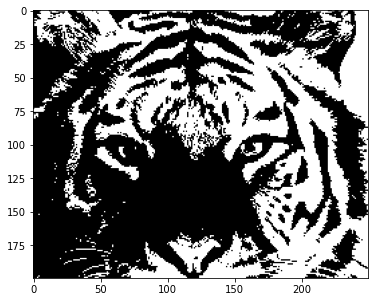

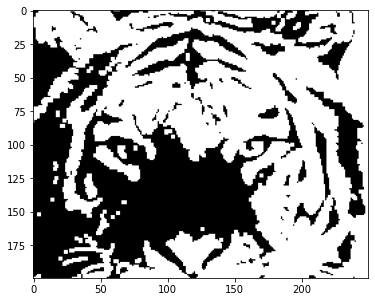

In [68]:
plot_image(tiger_bw[100:300, 150:400])
plot_image(tiger_after_dilation[100:300, 150:400])

### Erosion

In [69]:
# structuring_element 3 x 3 
x, y = 3, 3

tiger_after_erosion = tiger_bw.copy()
for i in range(tiger_bw.shape[0] - x):
    for j in range(tiger_bw.shape[1] - y):
        tiger_after_erosion[i+1, j+1] = tiger_bw[i:i+x, j:j+y].min()

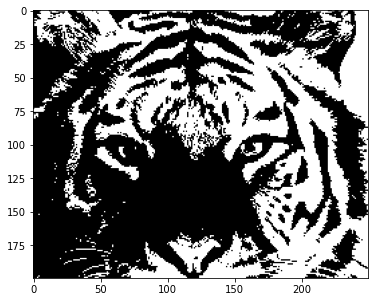

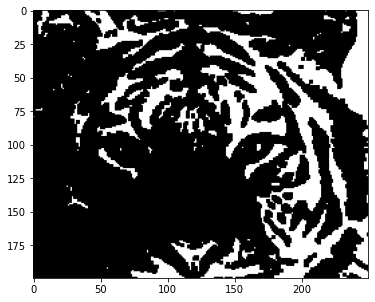

In [70]:
plot_image(tiger_bw[100:300, 150:400])
plot_image(tiger_after_erosion[100:300, 150:400])

### Opening

In [71]:
# structuring_element 3 x 3 
x, y = 3, 3

tiger_after_opening = tiger_bw.copy()
for i in range(tiger_bw.shape[0] - x):
    for j in range(tiger_bw.shape[1] - y):
        tiger_after_opening[i+1, j+1] = tiger_bw[i:i+x, j:j+y].min()
        
        
for i in range(tiger_bw.shape[0] - x):
    for j in range(tiger_bw.shape[1] - y):
        tiger_after_opening[i+1, j+1] = tiger_bw[i:i+x, j:j+y].max()

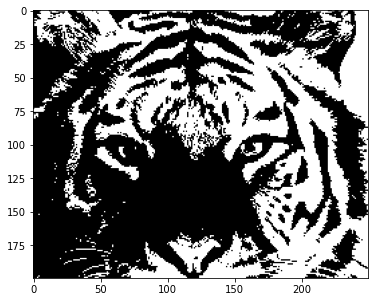

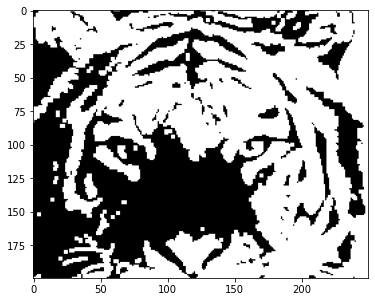

In [72]:
plot_image(tiger_bw[100:300, 150:400])
plot_image(tiger_after_opening[100:300, 150:400])

### Skimage Opening

In [74]:
tiger_after_opening_skimage = binary_opening(tiger_bw)

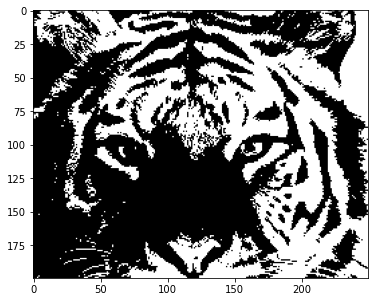

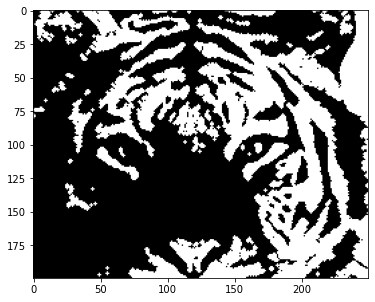

In [75]:
plot_image(tiger_bw[100:300, 150:400])
plot_image(tiger_after_opening_skimage[100:300, 150:400])

### Skimage Closing

In [80]:
tiger_after_closing_skimage = binary_closing(tiger_bw)

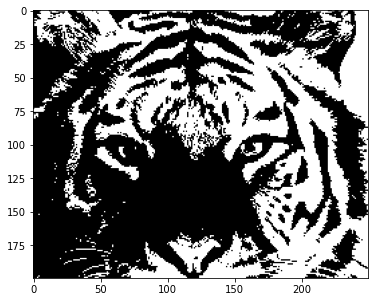

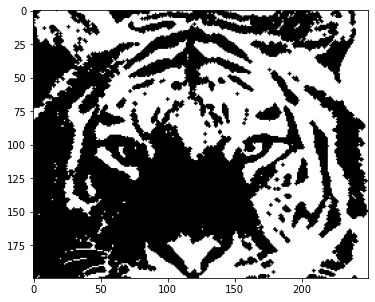

In [81]:
plot_image(tiger_bw[100:300, 150:400])
plot_image(tiger_after_closing_skimage[100:300, 150:400])

Opening маха salt - белите пикселчета поръсени върху изображението - няма ги мустаците. Но не маха поръсените черни пиксели.

Closing не пипа много salt, но свързва черните райони.

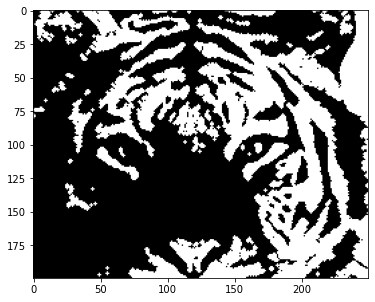

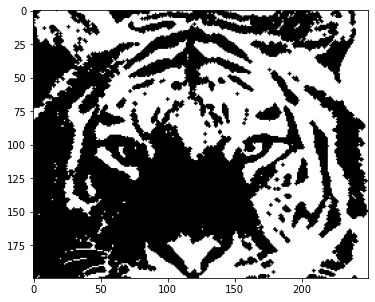

In [79]:
plot_image(tiger_after_opening_skimage[100:300, 150:400])
plot_image(tiger_after_closing_skimage[100:300, 150:400])

## Image Transformatons

Steps:
1. Resize, reshape an image.

In [82]:
from skimage.transform import resize, rotate

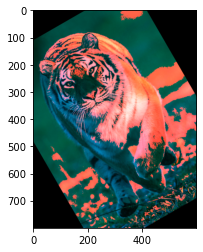

In [85]:
plt.imshow(rotate(tiger, 30))

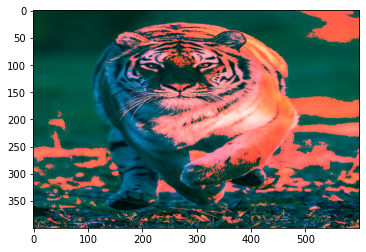

In [87]:
plt.imshow(resize(tiger, output_shape=(400, 600)))

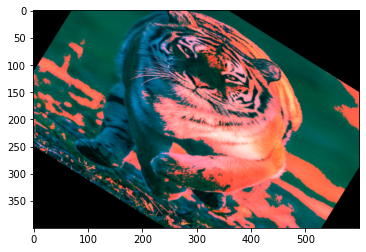

In [88]:
plt.imshow(rotate(resize(tiger, output_shape=(400, 600)), -32))

## Text Processing

### Collections Counter Demo

In [106]:
c1 = Counter("""Dict subclass for counting hashable items.  Sometimes called a bag
or multiset.  Elements are stored as dictionary keys and their counts
are stored as dictionary values.""")

In [111]:
c1.most_common(5)

[(' ', 25), ('s', 15), ('e', 15), ('a', 14), ('t', 13)]

### Alice book

Steps:
1. Read a text file.
2. Demonstrate text indexing.
2. Write a manual character counter.
3. Use collections counter.
4. Top 10 highest occuring characters.
5. Top 10 highest occuring words.
6. How many does "Alice" occur in the text
7. Make a histogram of the char occurances. Actually use bar chart.

In [122]:
with open('alice.txt', encoding='utf-8') as f:
    text = f.read()
# print(text[:100])

In [125]:
# # Manual Counter

# occurances = {}
# for character in text[:1000]:
#     if character not in occurances:
#         occurances[character] = 0
#     occurances[character] += 1
# print(occurances)

In [126]:
character_counter = Counter(text)

In [133]:
character_counter.most_common(10)

[(' ', 29580),
 ('e', 15243),
 ('t', 11754),
 ('o', 9348),
 ('a', 9172),
 ('n', 7926),
 ('i', 7881),
 ('h', 7669),
 ('s', 7054),
 ('r', 6481)]

In [134]:
word_counter = Counter(re.split('\W+', text))

In [135]:
word_counter.most_common(10)

[('the', 1693),
 ('and', 875),
 ('to', 802),
 ('a', 677),
 ('of', 609),
 ('I', 546),
 ('it', 543),
 ('she', 513),
 ('said', 458),
 ('in', 416)]

In [137]:
word_counter["Alice"]

401

In [152]:
chars = [char for (char, count) in character_counter.most_common(20)]
occurances = [count for (char, count) in character_counter.most_common(20)]

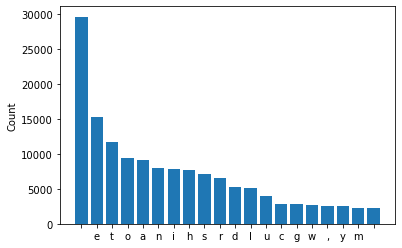

In [154]:
plt.bar(chars, occurances)
plt.ylabel('Count')
plt.show()

#### 1. Tokenization

Tokenization
1. Define token and tokenization.

In [158]:
# not good tokenization of the text in words
text.split(' ')[:3]

['\n\n\nProject', "Gutenberg's", "Alice's"]

In [197]:
words = re.split('\W+', text)

In [198]:
Counter(words).most_common(5)

[('the', 1693), ('and', 875), ('to', 802), ('a', 677), ('of', 609)]

#### 2. Normalization

In [199]:
words = [word.lower() for word in words]
words = [word for word in words if not word.isdigit()]

#### 3. Stopwords

In [200]:
# nltk.download('stopwords')

In [201]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [202]:
len(stopwords)

179

In [203]:
cleaned_words = [word for word in words if word not in stopwords]

In [207]:
Counter(cleaned_words).most_common(20)

[('said', 462),
 ('alice', 404),
 ('little', 129),
 ('one', 106),
 ('gutenberg', 93),
 ('know', 88),
 ('project', 87),
 ('like', 85),
 ('would', 83),
 ('went', 83),
 ('could', 78),
 ('queen', 76),
 ('thought', 74),
 ('time', 71),
 ('see', 70),
 ('well', 63),
 ('king', 63),
 ('turtle', 60),
 ('way', 58),
 ('began', 58)]

In [205]:
len(words)

30517

In [206]:
len(cleaned_words)

14091

#### 4. Stemming

Групиране на думите с общ корен.

In [208]:
stemmer = nltk.stem.porter.PorterStemmer()

In [211]:
stemmed_words = [stemmer.stem(word) for word in cleaned_words]

In [212]:
len(stemmed_words)

14091

In [215]:
len(Counter(cleaned_words))

2870

In [216]:
len(Counter(stemmed_words))

2149

In [217]:
Counter(cleaned_words).most_common(5)

[('said', 462),
 ('alice', 404),
 ('little', 129),
 ('one', 106),
 ('gutenberg', 93)]

In [218]:
Counter(stemmed_words).most_common(5)

[('said', 462), ('alic', 404), ('littl', 129), ('one', 107), ('look', 106)]

### News

In [227]:
# news = fetch_20newsgroups()['data']

## Hamburger

In [7]:
hamburger = imread('https://lh4.googleusercontent.com/O4xOxs7rftenKIzA9C5Ujarfrtn-z26IPrOZn9yLSMOfNBISUk4G8ESmUGqqIf3MNLLlQQgVWPHcHRKN4hJdKRTvQ_Hj3eQz5py1dE-r3eukcU8sAIHAPC6M4n-9SAct=w626')

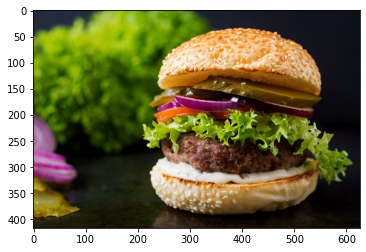

In [9]:
plt.imshow(hamburger)

In [24]:
red, green, blue = [hamburger[:,:,channel] for channel in range(3)]

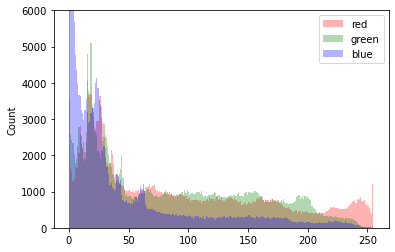

In [25]:
labels = ['red', 'green', 'blue']
channels = [red, green, blue]

for label, channel in zip(labels, channels):
    plt.hist(channel.ravel(), bins=256, alpha=0.3, label=label, color=label)
plt.ylim((0, 6000))
plt.ylabel('Count')
plt.legend()
plt.show()

In [26]:
for label, channel in zip(labels, channels):
    print(f'{label} mean: {channel.mean()}')

red mean: 90.08790156373304
green mean: 84.07082002129926
blue mean: 36.792577439645726


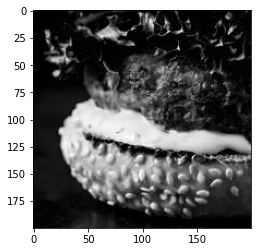

In [30]:
plt.imshow(blue[200:400, 200:400], cmap='gray')

In [34]:
structuring_element = np.ones(shape=(3,3))
blue_after_opening = binary_opening(blue, footprint=structuring_element)

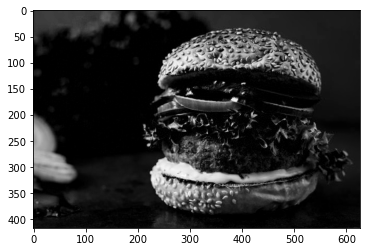

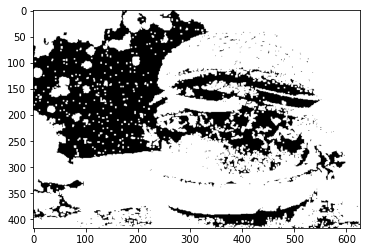

In [40]:
for image in [blue, blue_after_opening]:
    plt.imshow(image, cmap='gray')
    plt.show()

In [47]:
np.unique(blue_after_opening.astype(int), return_counts=True)

(array([0, 1]), array([ 78052, 182990], dtype=int64))

## Pride and Prejudice

In [57]:
with open('1342-0.txt', encoding='utf-8') as f:
    pride_and_prejudice = f.read()

In [62]:
character_counter = Counter(pride_and_prejudice)

In [75]:
character_counter.most_common(10)

[(' ', 183055),
 ('e', 70510),
 ('t', 47385),
 ('a', 42234),
 ('o', 41163),
 ('n', 38442),
 ('i', 36208),
 ('h', 33960),
 ('r', 33389),
 ('s', 33289)]

In [112]:
words = re.split('\\W+', pride_and_prejudice.lower())

In [113]:
words_counter = Counter(words)

In [114]:
words_counter['pride']

52

In [110]:
pride_and_prejudice.lower().count('prejudice')

13

In [92]:
top10_words = [word for word, occurance in words_counter.most_common(10)]
top10_occurances = [occurance for word, occurance in words_counter.most_common(10)]

<BarContainer object of 10 artists>

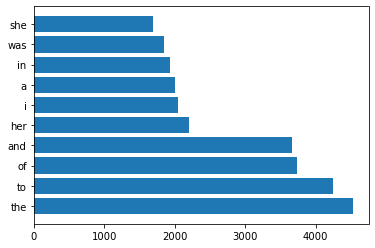

In [93]:
plt.barh(top10_words, top10_occurances, )

In [109]:
text = """Return centered in a Strings of length width. Padding is done using the specified fillchar (default is an ASCII space). The original string is returned if width is less than or equal to len(s)."""
text.lower().count('string')

2

In [115]:
words_counter.most_common(50)

[('the', 4521),
 ('to', 4245),
 ('of', 3734),
 ('and', 3657),
 ('her', 2202),
 ('i', 2048),
 ('a', 2006),
 ('in', 1939),
 ('was', 1846),
 ('she', 1691),
 ('that', 1555),
 ('it', 1550),
 ('not', 1449),
 ('you', 1401),
 ('he', 1328),
 ('his', 1257),
 ('be', 1256),
 ('as', 1193),
 ('had', 1172),
 ('with', 1098),
 ('for', 1084),
 ('but', 1006),
 ('is', 879),
 ('have', 846),
 ('at', 802),
 ('mr', 784),
 ('him', 752),
 ('on', 729),
 ('my', 702),
 ('s', 664),
 ('by', 663),
 ('all', 640),
 ('elizabeth', 634),
 ('they', 599),
 ('so', 593),
 ('were', 565),
 ('which', 546),
 ('could', 526),
 ('been', 513),
 ('from', 508),
 ('no', 501),
 ('very', 490),
 ('this', 488),
 ('what', 478),
 ('would', 467),
 ('your', 446),
 ('their', 439),
 ('them', 429),
 ('me', 427),
 ('darcy', 417)]